In [17]:
!ls -l /Users/kristywendt/Desktop/geneexpress.csv

-rw-r--r--@ 1 kristywendt  staff  8703 Feb 19 23:01 /Users/kristywendt/Desktop/geneexpress.csv


In [18]:
!pwd

/Users/kristywendt


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
pd.read_csv ("/Users/kristywendt/Downloads/geneexpress.csv")

,name,exp_1,exp_2,exp_3,exp_4,exp_5,exp_6,exp_7,exp_8,exp_9,exp_10
0,gene_1,55.17,51.84,55.91,56.87,55.70,54.62,55.24,54.10,53.80,54.89
1,gene_2,55.04,52.23,55.03,56.36,56.13,53.29,54.39,56.40,55.83,55.76
2,gene_3,54.68,55.86,57.09,53.82,54.42,55.52,56.63,53.67,55.00,54.52
3,gene_4,54.98,55.87,56.15,53.80,57.93,56.52,53.80,54.90,53.89,54.77
4,gene_5,11.01,19.56,31.63,39.77,49.66,61.49,68.14,80.15,91.10,101.56
...,...,...,...,...,...,...,...,...,...,...,...
94,gene_95,9.63,21.38,30.10,40.06,51.89,60.69,70.34,80.11,89.85,96.61
95,gene_96,54.28,55.82,53.95,57.27,54.42,52.86,57.21,54.10,57.31,57.12
96,gene_97,55.45,53.98,54.06,56.69,53.13,55.71,54.14,54.25,54.50,56.12
97,gene_98,102.27,89.41,81.69,70.10,62.20,49.71,39.84,30.70,18.65,7.95


In [21]:
uniform_data = np.random.rand(10, 12)

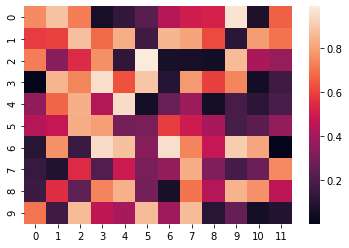

In [22]:
ax = sns.heatmap(uniform_data)